In [1]:
import geopandas as gpd

from fracability import Entities
from fracability.operations.Geometry import center_object, tidy_intersections
from fracability.operations.Topology import nodes_conn
from fracability.Plotters import matplot_stats_summary
from fracability.operations.Statistics import NetworkFitter
import scipy.stats as ss
from scipy.optimize import minimize
import numpy as np


In [2]:
n1_path = '/home/gabriele/STORAGE/Unibro/Libri-e-dispense/Magistrale/Tesi/pz_pers/test_reti/attachments/Set_1.shp'
n2_path = '/home/gabriele/STORAGE/Unibro/Libri-e-dispense/Magistrale/Tesi/pz_pers/test_reti/attachments/Set_2.shp'
b_path = 'fracability/datasets/Interpretation_boundary_laghettoSalza.shp'


fracs_1 = gpd.read_file(n1_path)
fracs_2 = gpd.read_file(n2_path)

bound_gpd = gpd.read_file(b_path)

In [3]:
fractures_1 = Entities.Fractures(fracs_1)
fractures_2 = Entities.Fractures(fracs_2)

boundaries = Entities.Boundary(bound_gpd)

# clean_dup_points(fractures)



### Statistics on set 1

In [ ]:
fracture_net = Entities.FractureNetwork()

fracture_net.add_boundaries(boundaries)

fracture_net.fractures = fractures_1

center_object(fracture_net)

tidy_intersections(fracture_net)

nodes = nodes_conn(fracture_net)
fracture_net.add_nodes(nodes)




In [ ]:
fitter = NetworkFitter(fracture_net)

fitter.find_best_distribution()
matplot_stats_summary(fitter)

### Statistics on set 2

In [ ]:
fracture_net = Entities.FractureNetwork()

fracture_net.add_boundaries(boundaries)

fracture_net.fractures = fractures_2

center_object(fracture_net)

tidy_intersections(fracture_net)

nodes = nodes_conn(fracture_net)
fracture_net.add_nodes(nodes)




In [ ]:
fitter = NetworkFitter(fracture_net)

fitter.find_best_distribution()
matplot_stats_summary(fitter)

### Statistics on whole fracture net

In [4]:
fracture_net = Entities.FractureNetwork()

fracture_net.add_boundaries(boundaries)

fracture_net.add_fractures([fractures_1, fractures_2])

center_object(fracture_net)

tidy_intersections(fracture_net)

nodes = nodes_conn(fracture_net)
fracture_net.add_nodes(nodes)


Calculating intersections -\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/

In [17]:
fitter = NetworkFitter(fracture_net)

fitter_name = 'gamma'

fitter.fit(fitter_name)

fitter.find_best_distribution()


name                                                         burr12
AICc                                                    3316.397227
BIC                                                     3338.169541
log_likelihood                                         -1654.186938
distribution      <scipy.stats._distn_infrastructure.rv_continuo...
params            (2.4578152987175885, 0.4069822658485208, 0, 0....
Name: 0, dtype: object

/home/gabriele/anaconda3/envs/fracability/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1404: RuntimeWarning: invalid value encountered in sqrt
  res = sqrt(self.stats(*args, **kwds))


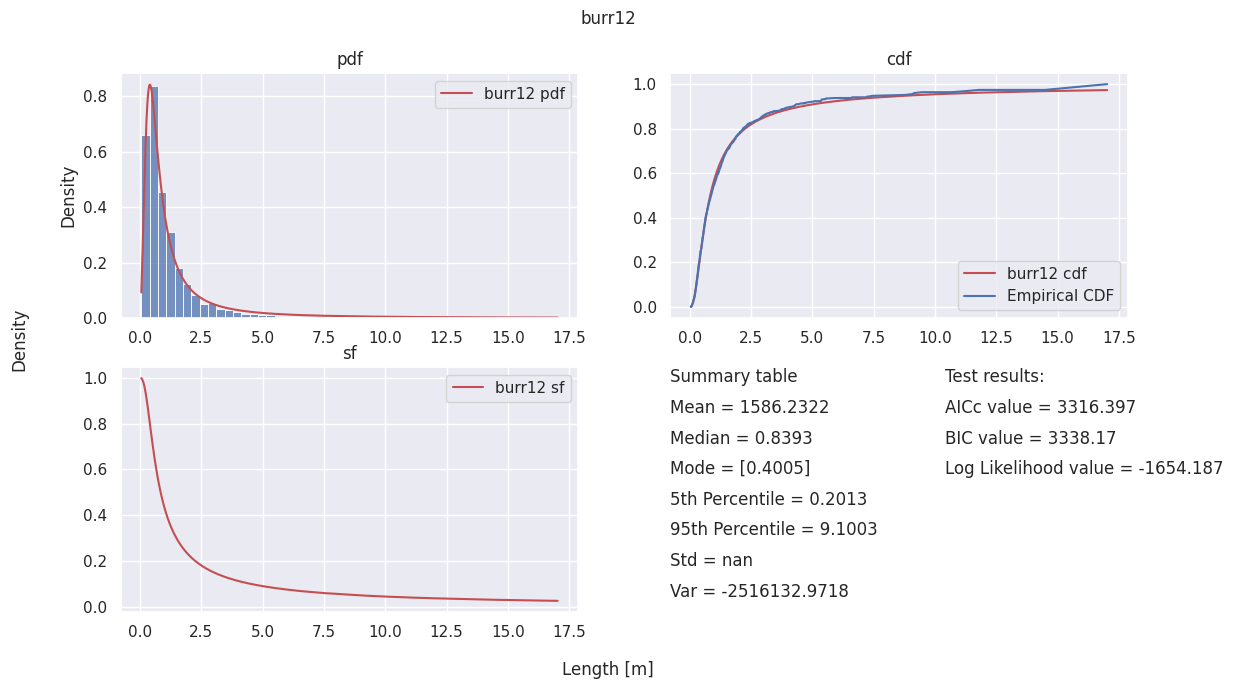

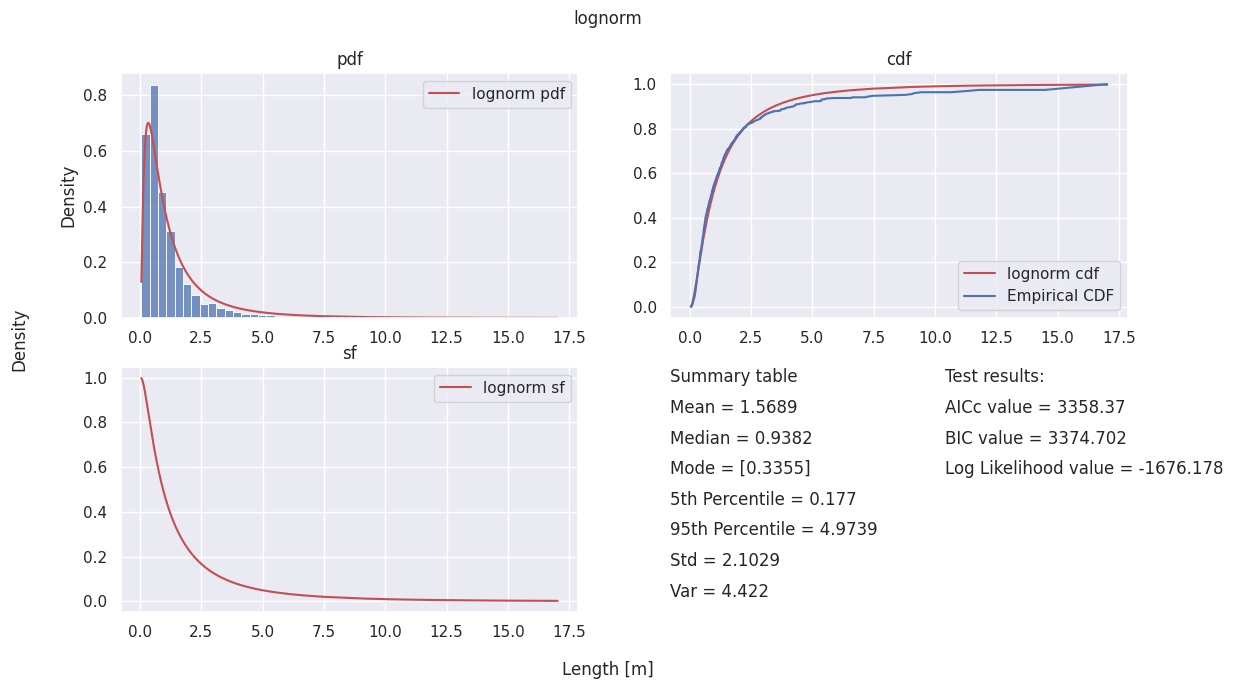

In [18]:
matplot_stats_summary(fitter)

### Plot network

In [ ]:
fracture_net.vtkplot()